In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 256
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
| 1000 		 0.1 		 0.1 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.0
The s.d. of I is: 0.0
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.1
The mean of I is: 0.1
-------------------------------------


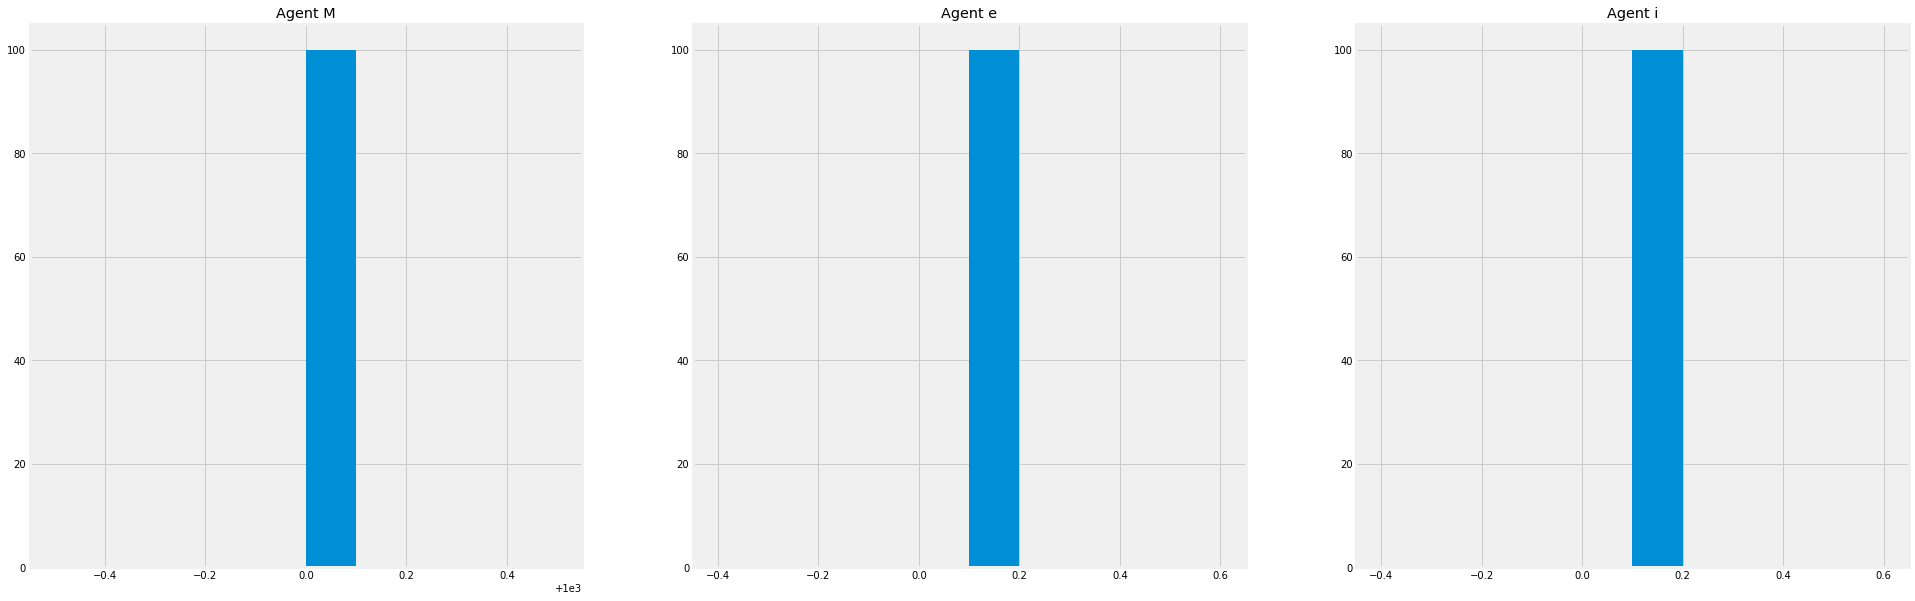

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 90.0, Temptation: 100.0, Sucker: -10.0, Punishment: 0
Agent 1 playing Agent 0: Reward: 90.0, Temptation: 100.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 90.0, Temptation: 100.0, Sucker: -10.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 90.0, Temptation: 100.0, Sucker: -10.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 90.0, Temptation: 100.0, Sucker: -10.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 90.0, Temptation: 100.0, Su

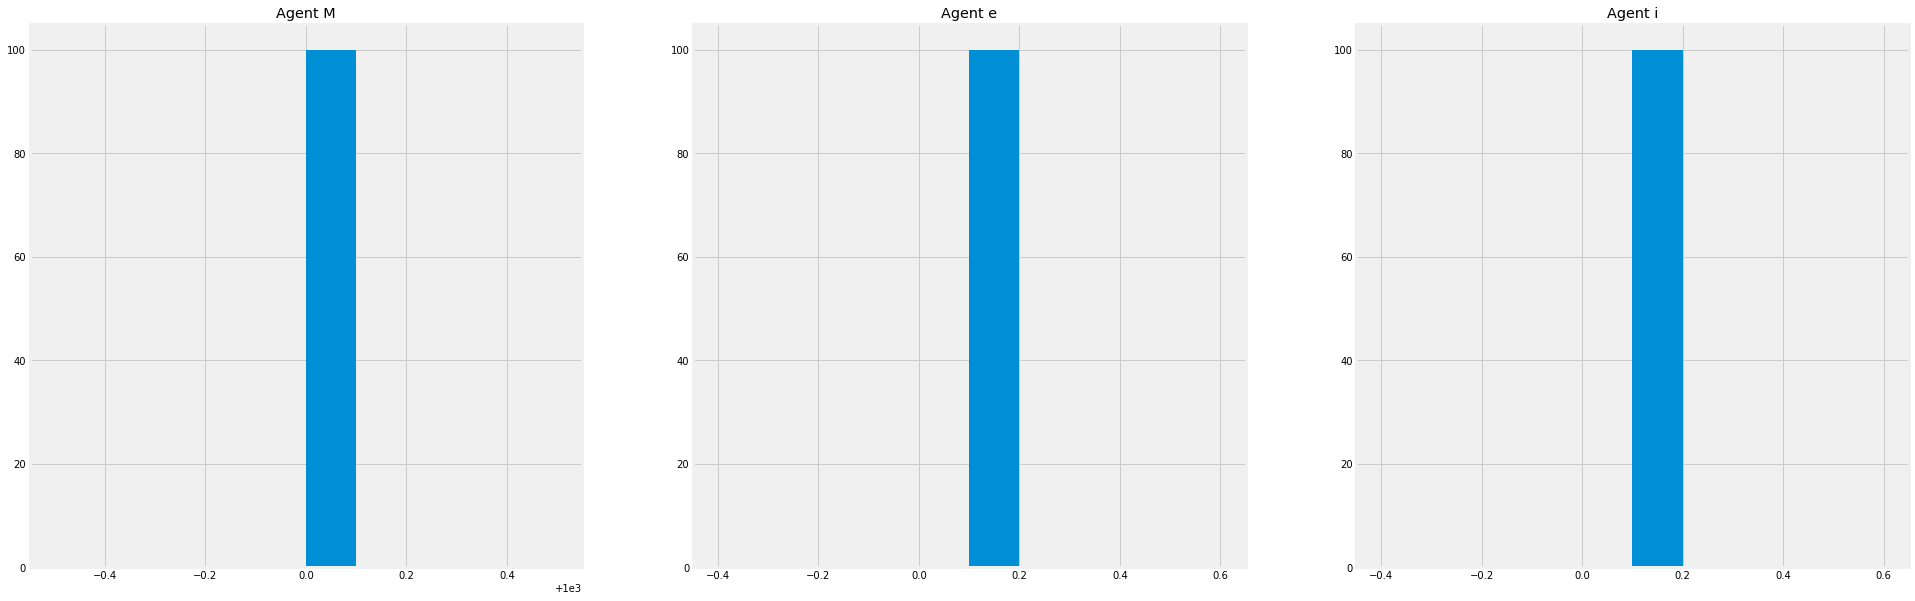

In [2]:
agents = get_agents(homogenous = True)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)
check_parameters(agents) #correct result because homogenous = True

Tournament has started...
Tournament has ended. The simulation took 15 minutes.
    S.D.  Counts
0    0.5     291
1    0.6     266
2    0.7     260
3    0.8     258
4    0.9     235
5    1.0     197
6    1.1     182
7    1.2     163
8    1.3     143
9    1.4     134
10   1.5     118
11   1.6      98
12   1.7      89
13   1.8      64
14   1.9      45
15   2.0      36
16   2.1      21
17   2.2      18
18   2.3       9
19   2.4      10
20   2.5       7
21   2.6       8
22   2.7       7
23   2.8       3
24   2.9       3
25   3.0       3


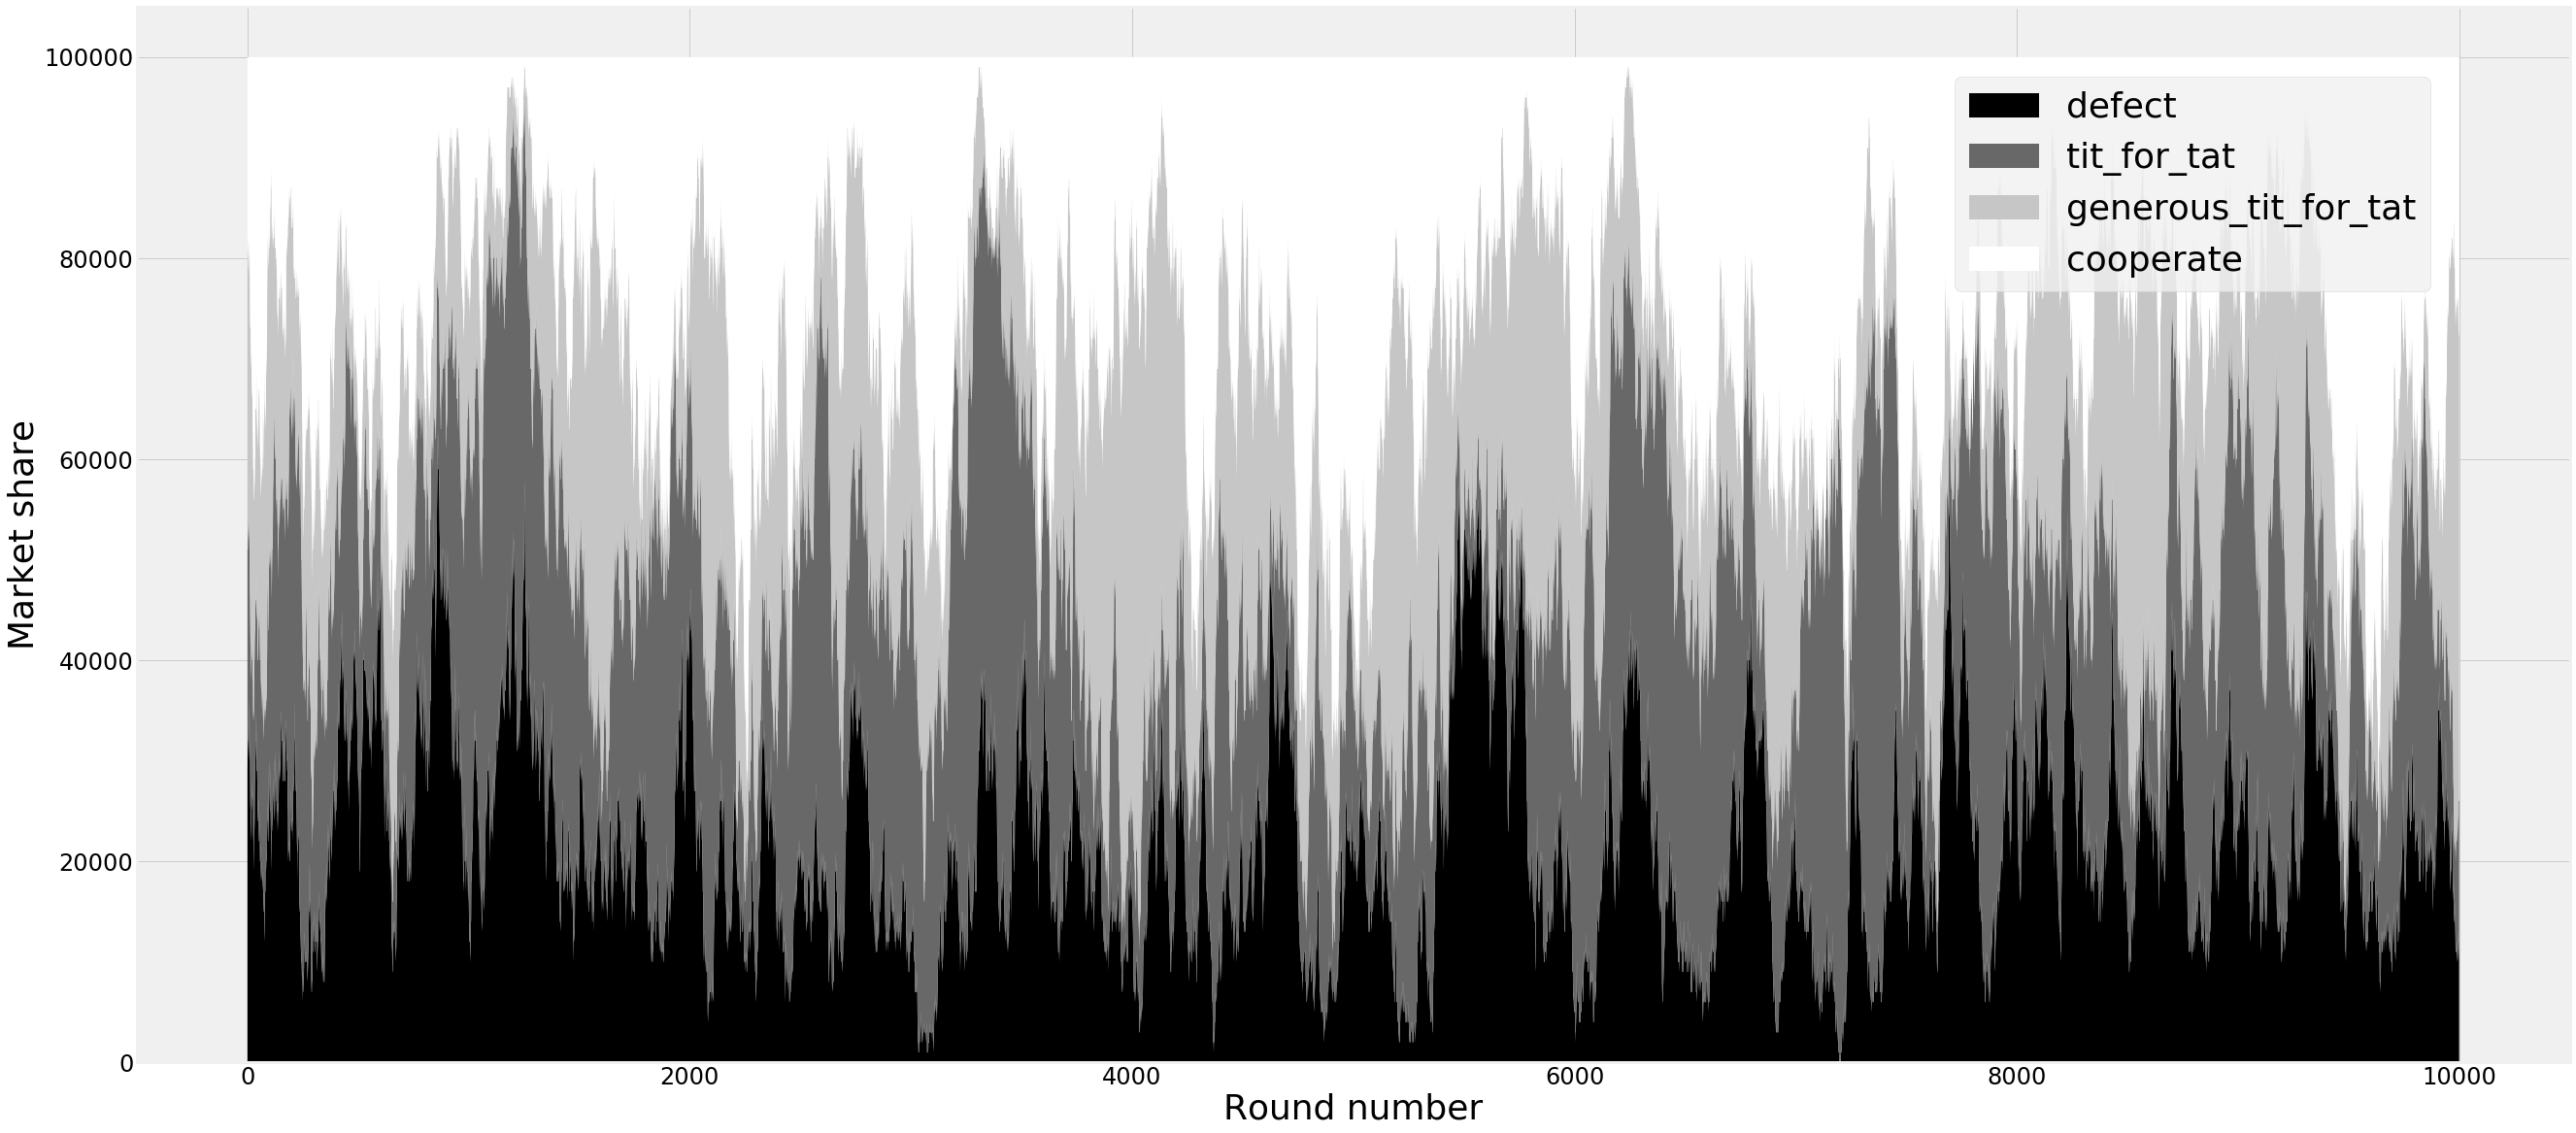

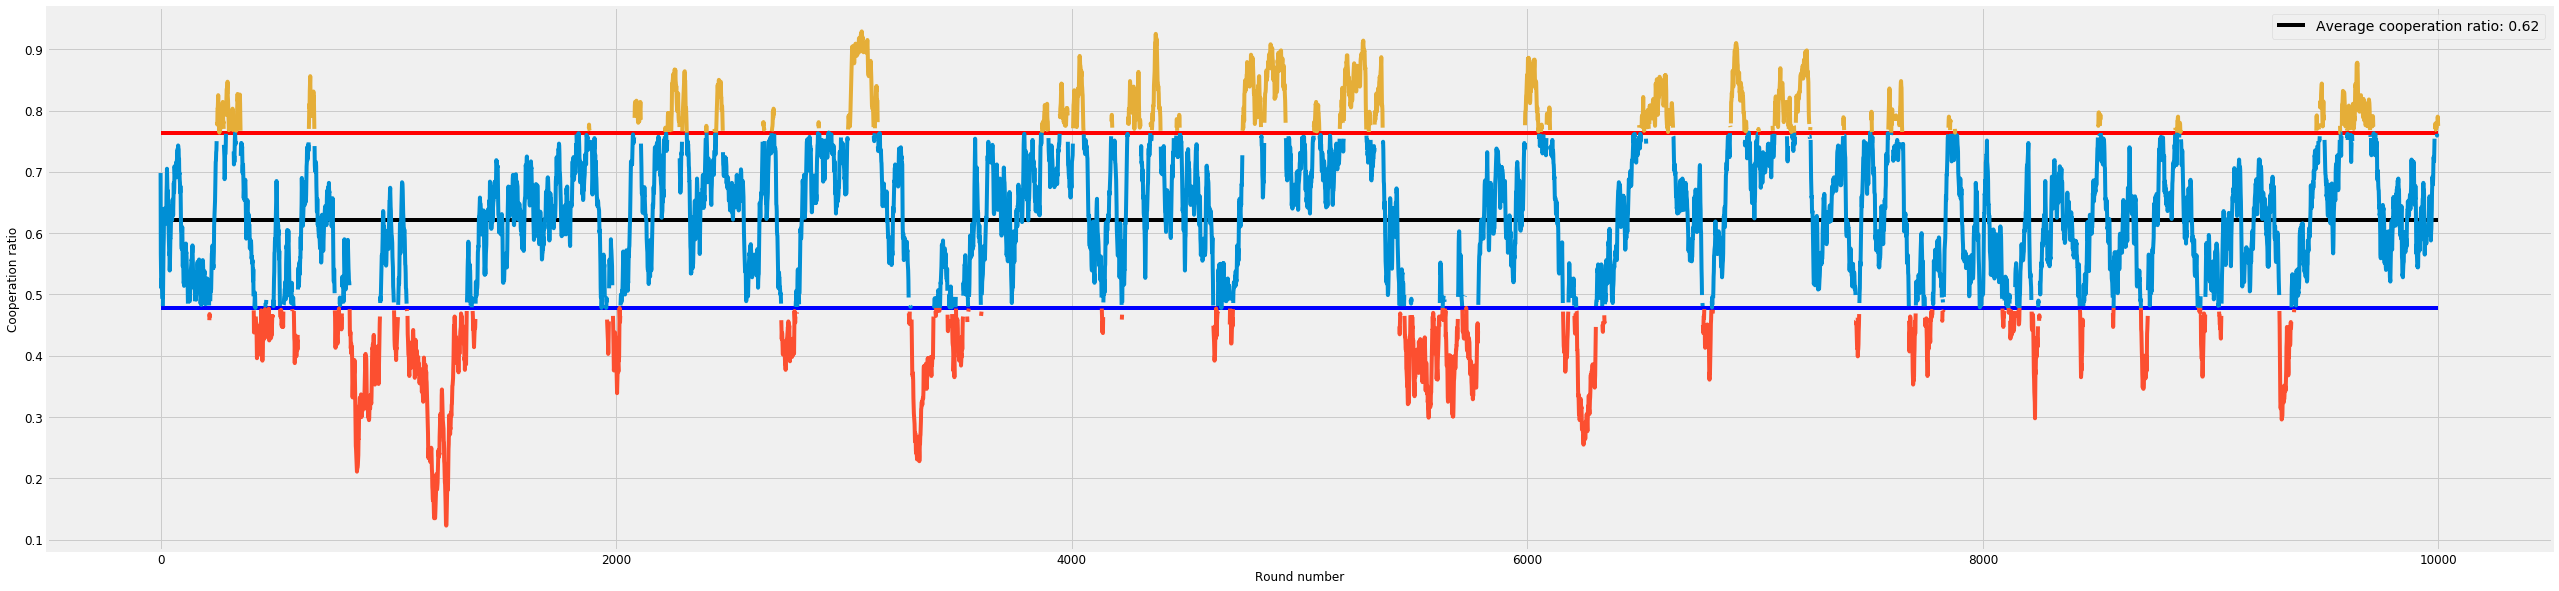

In [3]:
seed256_mm1000_me01_mi01_sdm0_sde0_sdi0 = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(seed256_mm1000_me01_mi01_sdm0_sde0_sdi0)
C_D_ratios_per_round_var(seed256_mm1000_me01_mi01_sdm0_sde0_sdi0, constant = 1)
outliers = count_outliers(seed256_mm1000_me01_mi01_sdm0_sde0_sdi0, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values())}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "outlier_counts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_cooperate_csv(seed256_mm1000_me01_mi01_sdm0_sde0_sdi0, type_of_tournament= "_controlgroup", seed = str(seed))